<a href="https://colab.research.google.com/github/kimkihyun1/Project1/blob/main/AI_14_%EA%B9%80%EA%B8%B0%ED%98%84_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Game Dataset**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
#데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [40]:
df = pd.read_csv('vgames2.csv', index_col=0) #index_col: 칼럼을 인덱스로 사용
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [41]:
#결측치 개수 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [42]:
#결측치 제거
df = df.dropna(axis=0)
df.reset_index(drop=True, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 1. 지역에 따른 선호하는 게임 장르 분석

In [43]:
#장르 종류
df['Genre'].unique()  #총 12종류

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [44]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [45]:
#Sales columns : 백만 단위
df = df[~(df['EU_Sales'].str.contains('K|M') | df['NA_Sales'].str.contains('K|M') | df['JP_Sales'].str.contains('K|M') | df['Other_Sales'].str.contains('K|M'))] 
#col_Sales = df.columns[5:]
#for col in col_Sales:
#  Sales_K = df.loc[df[col].str.contains('K'), col]
#  df.col = Sales_K.str.replace('K', '')
#  Sales_M = df.loc[df[col].str.contains('M'), col]
#  df.col = Sales_M.str.replace('M', '')

#데이터 타입 변경
df = df.astype({'Year': 'int'})

#1980년 이상 데이터
df_Year = df['Year'] >= 1980
df = df[df_Year]
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [46]:
#데이터 타입 변경
df.reset_index(drop=True, inplace=True)
df[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]] = df[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]].apply(pd.to_numeric)
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [47]:
#NA_Sales 데이터
df_NA_Sales = df[['Genre', 'NA_Sales']]
df_NA_Sales = df_NA_Sales.groupby('Genre').sum()
df_NA_Sales

,NA_Sales
Genre,
Action,801.89
Adventure,97.29
Fighting,210.51
Misc,380.36
Platform,410.96
Puzzle,118.40
Racing,334.14
Role-Playing,283.86
Shooter,544.63


In [48]:
#EU_Sales 데이터
df_EU_Sales = df[['Genre', 'EU_Sales']]
df_EU_Sales = df_EU_Sales.groupby('Genre').sum()
df_EU_Sales

,EU_Sales
Genre,
Action,486.60
Adventure,60.65
Fighting,94.18
Misc,200.14
Platform,184.11
Puzzle,49.95
Racing,222.66
Role-Playing,160.10
Shooter,293.38


In [49]:
#JP_Sales 데이터
df_JP_Sales = df[['Genre', 'JP_Sales']]
df_JP_Sales = df_JP_Sales.groupby('Genre').sum()
df_JP_Sales

,JP_Sales
Genre,
Action,149.85
Adventure,49.20
Fighting,82.58
Misc,99.47
Platform,121.88
Puzzle,56.16
Racing,50.60
Role-Playing,314.15
Shooter,36.53


In [50]:
#Other_Sales 데이터
df_Other_Sales = df[['Genre', 'Other_Sales']]
df_Other_Sales = df_Other_Sales.groupby('Genre').sum()
df_Other_Sales

,Other_Sales
Genre,
Action,176.14
Adventure,16.06
Fighting,34.33
Misc,69.97
Platform,47.88
Puzzle,12.13
Racing,73.48
Role-Playing,50.86
Shooter,96.68


In [51]:
#concat을 사용하여 장르를 기준으로 df_Sales 데이터프레임
df_Sales = pd.concat([df_NA_Sales, df_EU_Sales,df_JP_Sales,df_Other_Sales], axis=1)
df_Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,801.89,486.60,149.85,176.14
Adventure,97.29,60.65,49.20,16.06
Fighting,210.51,94.18,82.58,34.33
Misc,380.36,200.14,99.47,69.97
Platform,410.96,184.11,121.88,47.88
Puzzle,118.40,49.95,56.16,12.13
Racing,334.14,222.66,50.60,73.48
Role-Playing,283.86,160.10,314.15,50.86
Shooter,544.63,293.38,36.53,96.68


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


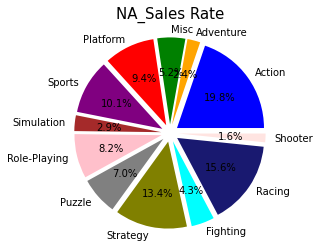

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


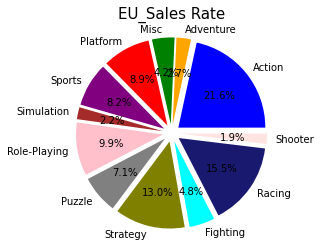

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


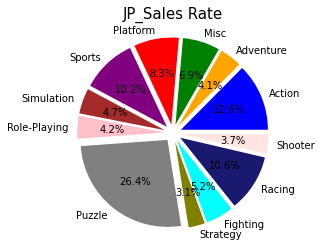

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


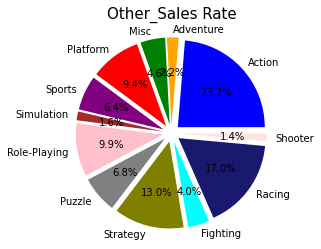

In [52]:
#파이 차트
explode = [0.1 for _ in range(12)]
colors = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','midnightblue','mistyrose']

#4개 한번에 그릴 때
#fig, axs = plt.subplots(2, 2, figsize=(14, 14))
#ax1, ax2, ax3, ax4 = axs.flatten()

plt.pie(df_NA_Sales, labels=df['Genre'].unique(), autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('NA_Sales Rate', size=15)
plt.show();

plt.pie(df_EU_Sales, labels=df['Genre'].unique(), autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('EU_Sales Rate', size=15)
plt.show();
#plt.title('NA_Sales Rate', size=15)
#plt.figure(figsize=(7,7))
plt.pie(df_JP_Sales, labels=df['Genre'].unique(), autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('JP_Sales Rate', size=15)
plt.show();

plt.pie(df_Other_Sales, labels=df['Genre'].unique(), autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Other_Sales Rate', size=15)
plt.show();

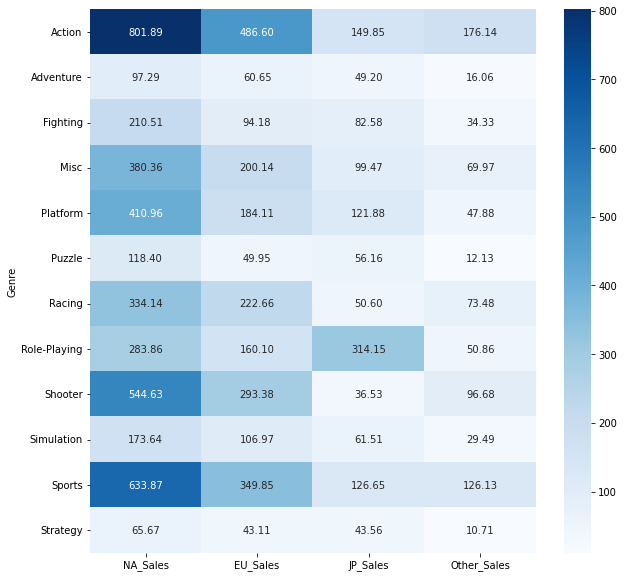

In [53]:
plt.figure(figsize=(10, 10))
locate_heatmap = sns.heatmap(df_Sales, annot=True, fmt='.2f', cmap='Blues') #annot : cell안에 값 표시유무, 
plt.show();

일본 지역을 제외한 전체지역에서는 Action, Sports, Shooter순으로 장르가 가장 선호되었습니다.





일본 지역은 Role-Playing, Action, Sports순으로 장르가 가장 선호되었습니다.



### 2. 연도별 게임 트렌드 분석

In [54]:
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [55]:
#Year, Genre 기준으로 개수
df_Year_Genre = df.groupby(['Year','Genre']).size().reset_index(name='Count')
df_Year_Genre

,Year,Genre,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,3
3,1980,Shooter,2
4,1981,Action,24
...,...,...,...
381,2016,Simulation,8
382,2016,Sports,34
383,2016,Strategy,9
384,2017,Action,1


In [56]:
#연도별 장르 최대값
df_Genre_Count = df_Year_Genre.groupby(['Year'])['Count'].transform(max) == df_Year_Genre['Count']
df_Genre_Max = df_Year_Genre[df_Genre_Count].reset_index(drop=True) #drop : 인덱스 기준열 삭제

#중복값 제거
df_Genre_Max = df_Genre_Max.drop_duplicates(subset=['Year','Count']).reset_index(drop=True) #subset : 중복데이터를 처리할 열
df_Genre_Max

,Year,Genre,Count
0,1980,Misc,3
1,1981,Action,24
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1985,Puzzle,4
6,1986,Action,6
7,1987,Sports,4
8,1988,Platform,3
9,1989,Puzzle,4


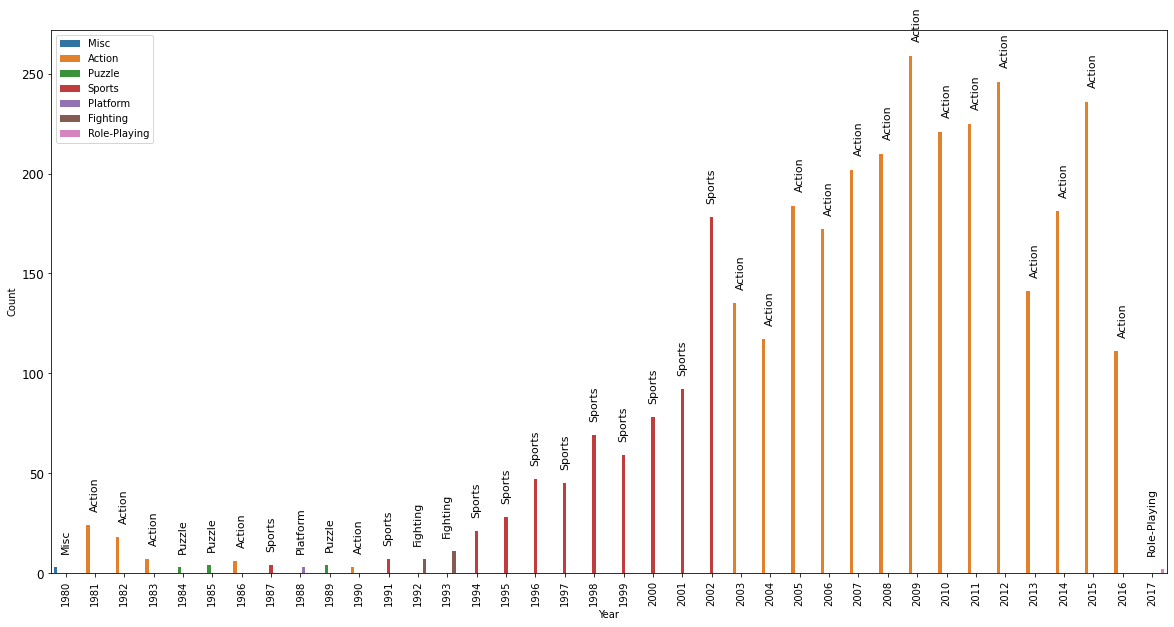

In [66]:
#bar plot
Genre_name = df_Genre_Max['Genre'].values
plt.figure(figsize=(20, 10))
trend_barplot = sns.barplot(data=df_Genre_Max, x='Year', y='Count', hue='Genre')
num = 0
for i in df_Genre_Max['Count']:
  trend_barplot.text(x=num, y= i+8, s=str(Genre_name[num]), color='black', size=11, rotation=90, ha='center')
  num += 1

plt.legend(loc='upper left')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.show();

1990년대 중반 이전까지는 장르별로 다양하게 선호되었고,


1990년대 중반 이후부터는 Sports장르가 선호되었고,


2000년대 중반 이후부터는 Action장르가 선호되었다.


Various Genres  ->  Sprots Genre  -> Action Genre

### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [67]:
# 판매량 총 합계
df['Sales_sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15377,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15378,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15379,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15380,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [72]:
df_Sales_10 = df[['Name', 'Sales_sum']]
df_Sales_10 = df_Sales_10.groupby('Name').sum()
df_Sales_10

,Sales_sum
Name,
'98 Koshien,0.40
.hack//G.U. Vol.1//Rebirth,0.17
.hack//G.U. Vol.2//Reminisce,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),0.16
.hack//G.U. Vol.3//Redemption,0.17
...,...
thinkSMART FAMILY!,0.03
thinkSMART: Chess for Kids,0.01
uDraw Studio,2.45


In [73]:
#출고량이 높은 10개 게임
df_Sales_10 = df_Sales_10.sort_values(by='Sales_sum', ascending=False)
df_Sales_10.head(10)

,Sales_sum
Name,
Wii Sports,82.74
Super Mario Bros.,45.31
Grand Theft Auto V,39.54
Tetris,35.84
Mario Kart Wii,35.83
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.38
Call of Duty: Modern Warfare 3,30.84
New Super Mario Bros.,30.01
